# Titanic - Machine Learning from Disaster

Predict survival on the Titanic

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.style=('darkgrid')

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [8]:
train_data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:title={'center':'Count of males and females'}, xlabel='Sex'>

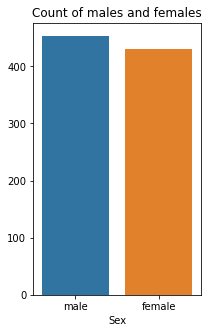

In [10]:
plt.figure(figsize=(3,5))
plt.title("Count of males and females")
sns.barplot(x=train_data['Sex'], y=train_data.index, ci=None)

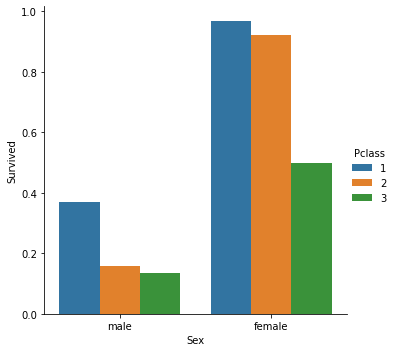

In [11]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=train_data, ci=None)

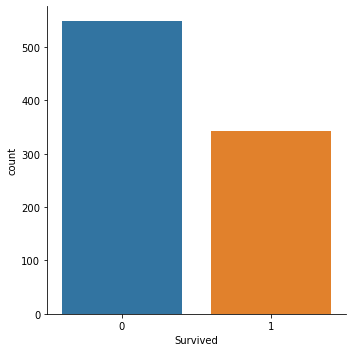

In [12]:
sns.catplot(x="Survived", kind="count", data=train_data)

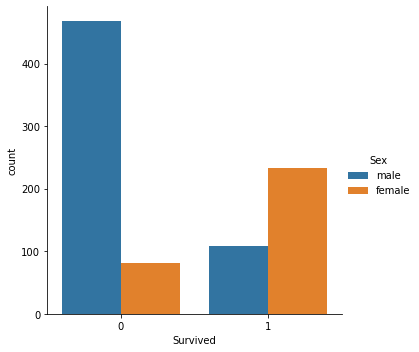

In [13]:
sns.catplot(x="Survived", hue="Sex", kind="count", data=train_data)

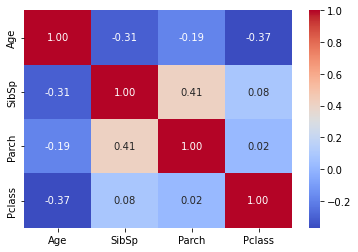

In [16]:
numerical_names = ["Age", "Sex", "SibSp", "Parch", "Pclass"]
_ = sns.heatmap(train_data[numerical_names].corr(),annot=True, fmt=".2f", cmap = "coolwarm")

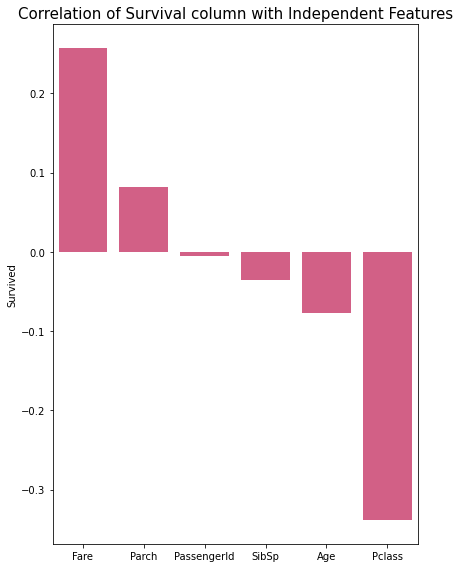

In [27]:
plt.figure(figsize=(6,8))
plt.title("Correlation of Survival column with Independent Features", fontsize=15)
corr = train_data.corr()["Survived"].sort_values(ascending=False)[1:]
sns.barplot(x=corr.index, y=corr, color=(0.90,0.30,0.50))
plt.tight_layout()
plt.show()

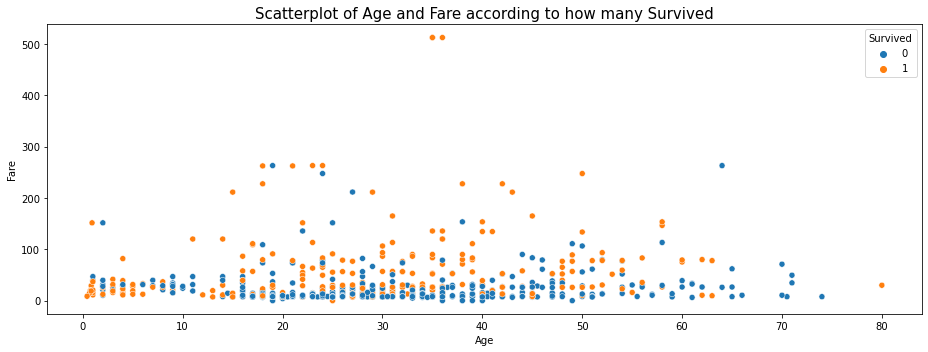

In [28]:
plt.figure(figsize=(13,5))
plt.title("Scatterplot of Age and Fare according to how many Survived", fontsize=15)
sns.scatterplot(data = train_data, x = "Age", y="Fare", hue='Survived')
plt.tight_layout()
plt.show()

In [30]:
numfeature = ["Age", "Fare"]
enumfeat = list(enumerate(numfeature))

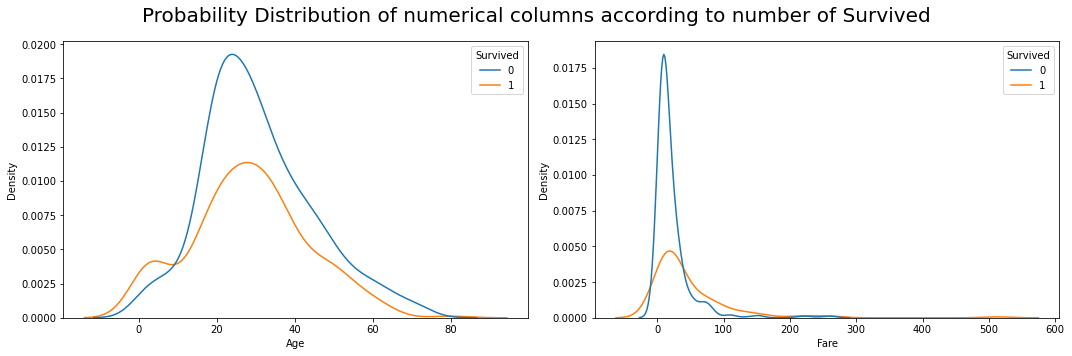

In [31]:
plt.figure(figsize=(15,5))
plt.suptitle("Probability Distribution of numerical columns according to number of Survived", fontsize = 20)
for i in enumfeat:
    plt.subplot(1,2,i[0]+1)
    sns.kdeplot(data=train_data, x=i[1], hue="Survived")
plt.tight_layout()
plt.show()

In [19]:
#Common method : IQR (Inter Quartile Range)
from collections import Counter
def outlier_detection(df, features):
    outlier_index = []
    
    for col in features:
        Q1 = np.percentile(df[col], 25, interpolation = 'midpoint')
        Q3 = np.percentile(df[col], 75, interpolation = 'midpoint')
        IQR = Q3-Q1
        
        # Upper bound & Lower bound
        index = df[(df[col] > (Q3+1.5*IQR))| (df[col] < (Q1-1.5*IQR))].index.to_list()
        outlier_index.extend(index)
        
    # Counts duplucates of index and select the outlier index with more than 3 outlier detection  
    counts = dict(Counter(outlier_index))
    duplicates = {key:value for key, value in counts.items() if value >= 3}
        
    return duplicates

outlier_detection(train_data, ["Age","Fare", "SibSp","Parch"])

{27: 3, 88: 3, 159: 3, 180: 3, 201: 3, 324: 3, 341: 3, 792: 3, 846: 3, 863: 3}

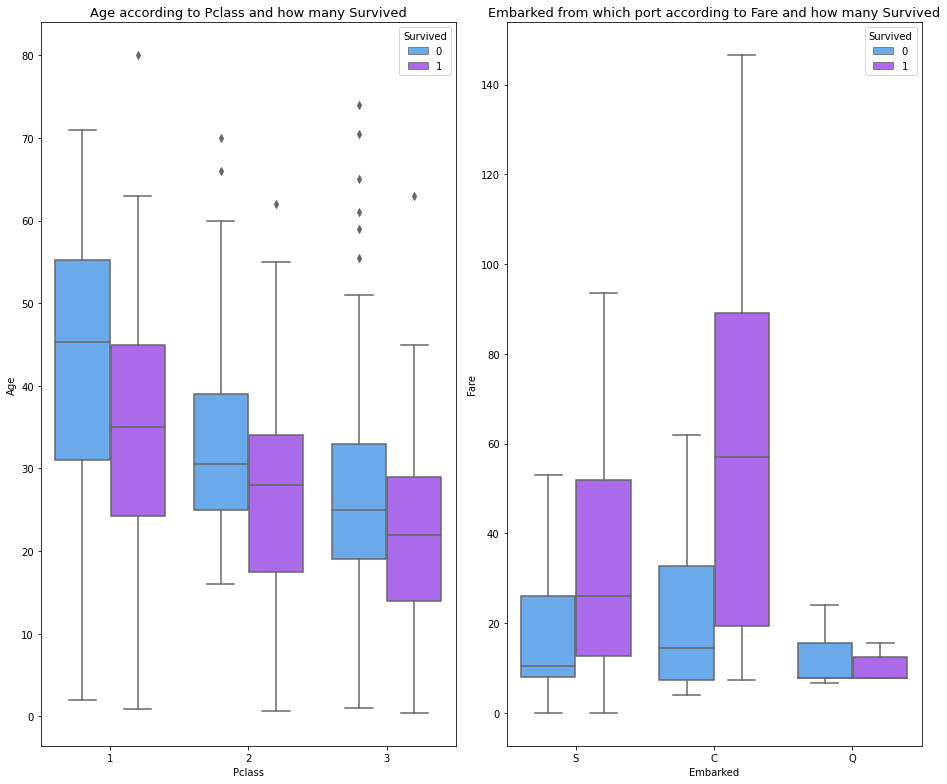

In [21]:
#Box and whisker plot
plt.figure(figsize=(13,11))

plt.subplot(1,2,1)
plt.title("Age according to Pclass and how many Survived", fontsize=13)
sns.boxplot(data=train_data, y="Age", x="Pclass", hue="Survived", palette="cool")

plt.subplot(1,2,2)
plt.title("Embarked from which port according to Fare and how many Survived", fontsize=13)
sns.boxplot(data = train_data, y="Fare", x="Embarked", hue="Survived", palette="cool", showfliers=False)

plt.tight_layout()
plt.show()

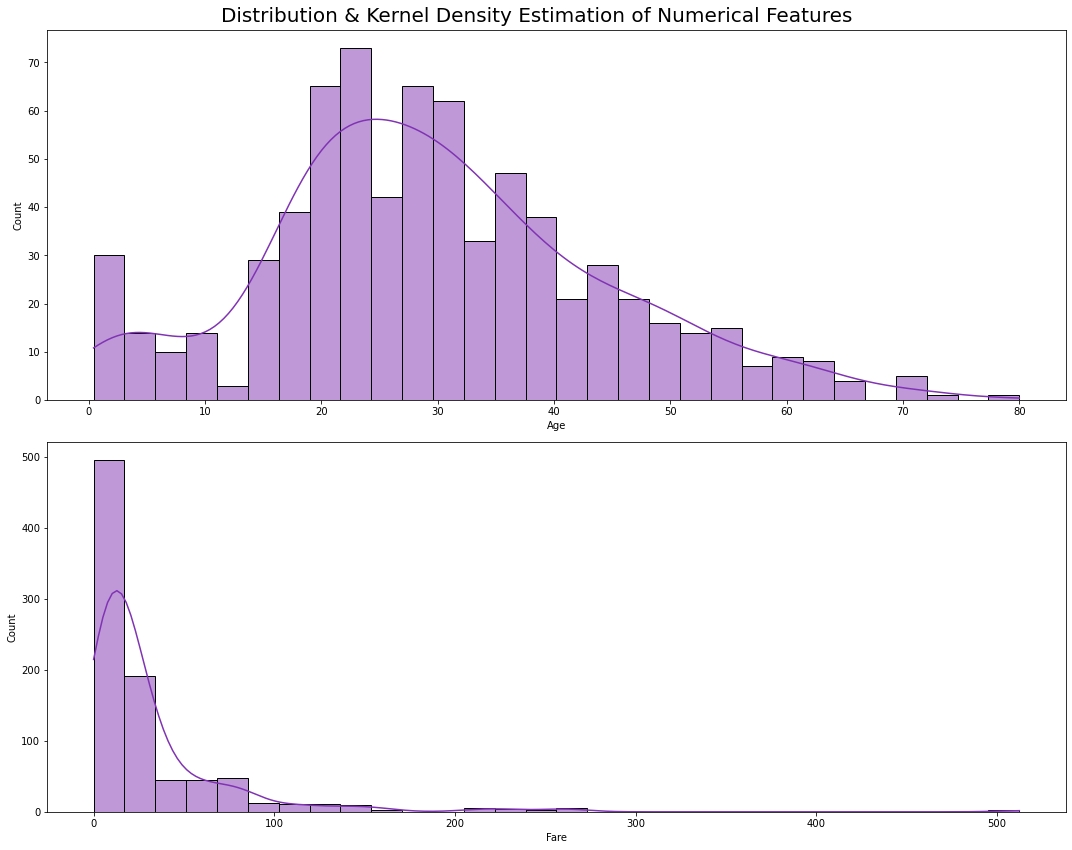

In [32]:
plt.figure(figsize=(15,12))
plt.suptitle("Distribution & Kernel Density Estimation of Numerical Features", fontsize=20)
for i in enumfeat:
    plt.subplot(2,1,i[0]+1)
    sns.histplot(x = train_data[i[1]], kde=True, bins=30, color=(0.50,0.20,0.70))
plt.tight_layout()
plt.show()

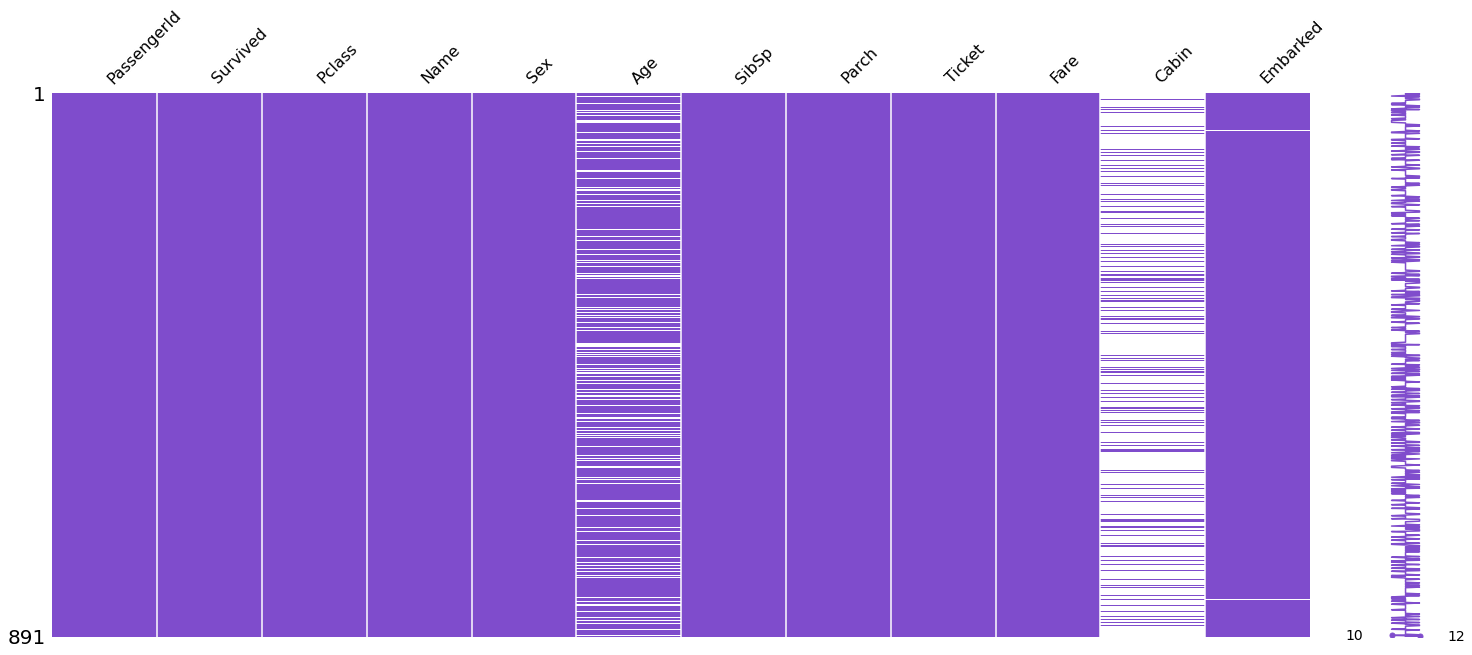

There are 177 missing values in column: Age
There are 687 missing values in column: Cabin
There are 2 missing values in column: Embarked


In [23]:
import missingno as msno
msno.matrix(train_data, color=(0.50,0.30,0.80))
plt.show()
x = train_data.isnull().sum()
for a, b in x.items():
    if b > 0:
        print(f"There are {b} missing values in column: {a}")

<AxesSubplot:>

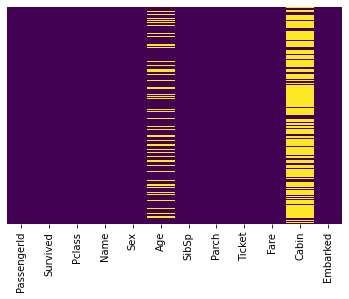

In [24]:
NAs = pd.isna(train_data)
sns.heatmap(NAs, yticklabels=False, cbar=False, cmap="viridis")

<AxesSubplot:>

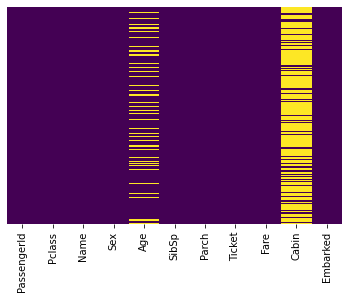

In [26]:
NAs = pd.isnull(test_data)
sns.heatmap(NAs, yticklabels=False, cbar=False, cmap="viridis")

In [14]:
#from sklearn.metrics import mean_absolute_error
#from sklearn.tree import DecisionTreeRegressor

#def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
#    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
#    model.fit(train_X, train_y)
#    preds_val = model.predict(val_X)
#    mae = mean_absolute_error(val_y, preds_val)
#    return(mae)

In [15]:
# selected_columns = ['Survived', 'Pclass', 'Sex', 'Age']

In [16]:
#col_titanic = train_data[selected_columns]
#print(col_titanic.shape[0])
#filtered_titanic = col_titanic.dropna(axis=0)
#rint(filtered_titanic.shape[0])
#rint(f"{col_titanic.shape[0] - filtered_titanic.shape[0]} cols with N/A dropped")
#iltered_titanic.head()